# 📌 Problem Statement: Stock Price Prediction

## Objective
Predict the **next day's closing stock price** of a selected company using its past **3 to 4 months of historical data**, with a strong focus on **model interpretability**.

## Scope
Using historical price and volume data of a company (e.g., **Tata Consultancy Services - TCS.NS**), the aim is to engineer meaningful features, explore the data, and build an **explainable regression model** to predict the next day's closing price.

## Problem Type
**Regression** — Predicting a continuous numerical value (closing price).

## Goals
- **Prediction:** Estimate the next day’s closing price.
- **Interpretation:** Understand which features impact the prediction using model explanations like **coefficients, feature importance, or SHAP values**.

## Evaluation Metric
- **MAE (Mean Absolute Error)**
- **RMSE (Root Mean Squared Error)**


In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# Define ticker and time period
ticker = "TCS.NS"
end_date = datetime.today()
start_date = end_date - timedelta(days=400)  # roughly 4 months

# Download data
data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2024-05-06,3831.022705,3849.488665,3764.535086,3764.535086,2053831
2024-05-07,3887.593262,3896.435521,3823.646041,3840.548881,2062112
2024-05-08,3885.638916,3892.820255,3848.169578,3870.055177,1247685
2024-05-09,3869.273682,3879.825761,3820.275222,3871.032401,1726486
2024-05-10,3804.495850,3882.366126,3795.849189,3871.618686,1672489


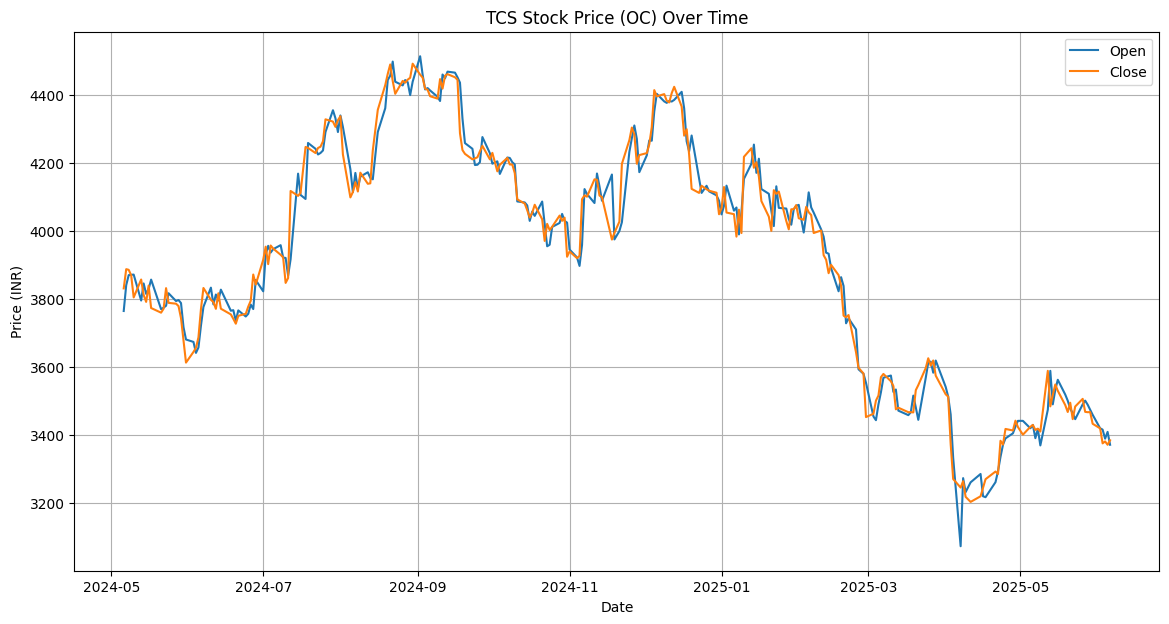

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(data.index, data['Open'], label='Open')
plt.plot(data.index, data['Close'], label='Close')

plt.title('TCS Stock Price (OC) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


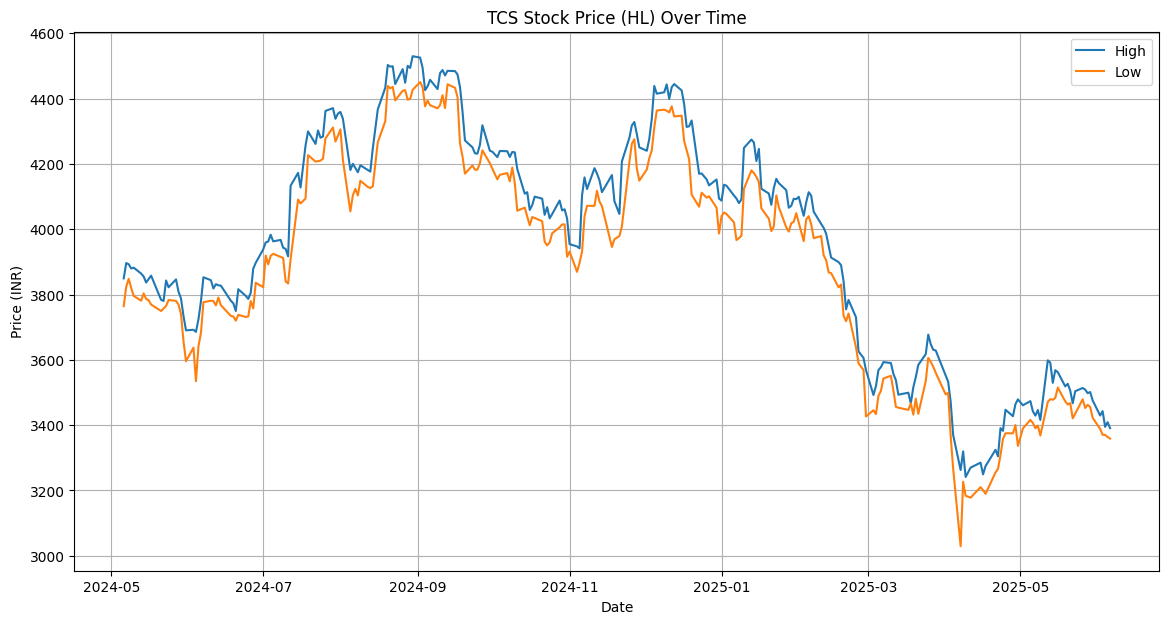

In [5]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data['High'], label='High')
plt.plot(data.index, data['Low'], label='Low')

plt.title('TCS Stock Price (HL) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

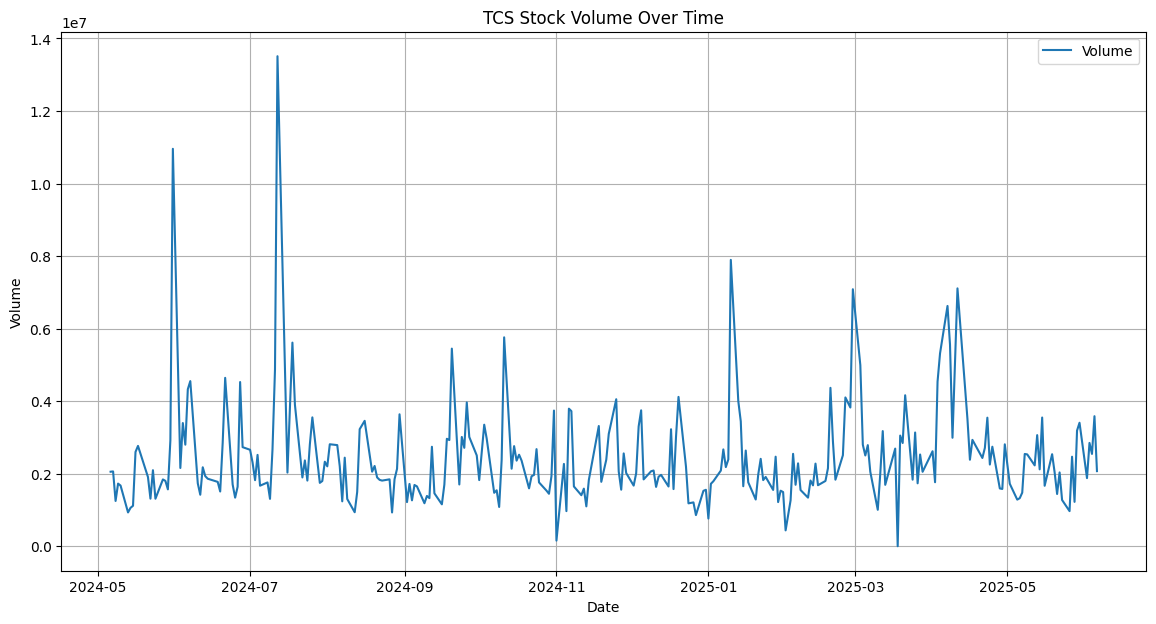

In [6]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Volume'], label='Volume')

plt.title('TCS Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

### Moving Averages

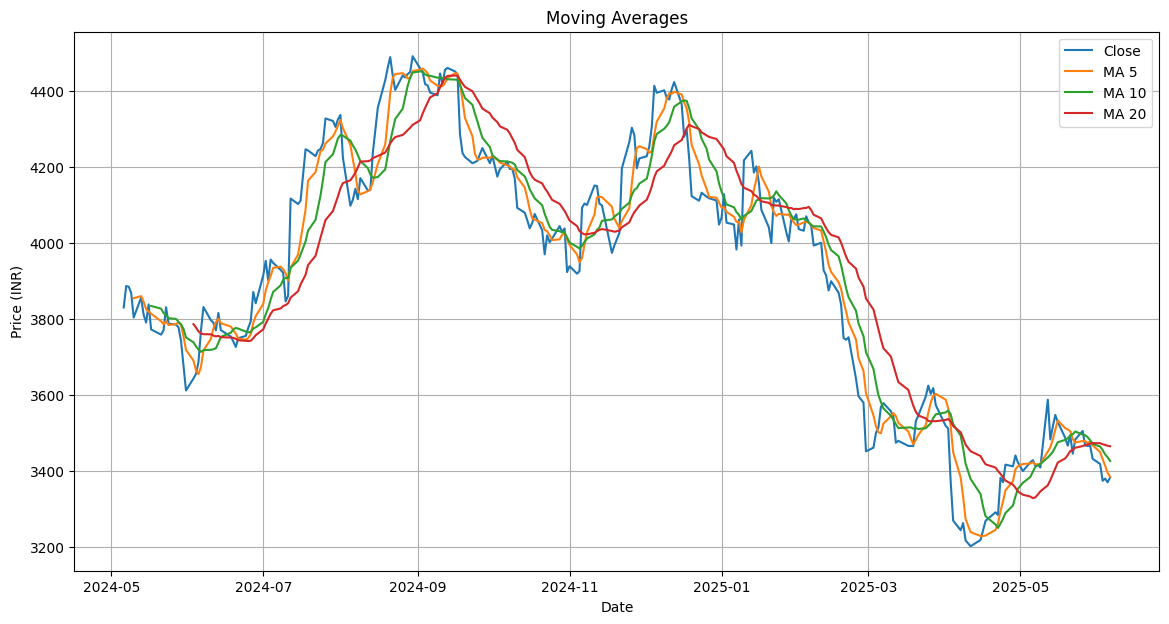

In [7]:
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA_5'], label='MA 5')
plt.plot(data.index, data['MA_10'], label='MA 10')
plt.plot(data.index, data['MA_20'], label='MA 20')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


### Relative Strength Index

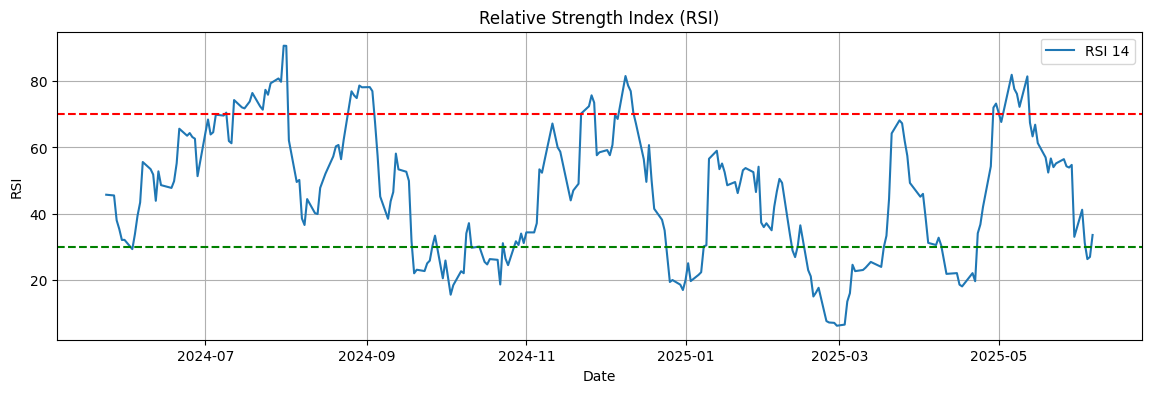

In [8]:
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

data['RSI_14'] = compute_RSI(data)

plt.figure(figsize=(14,4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--')  # Oversold
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

### Moving Average Convergence Divergence (MACD)

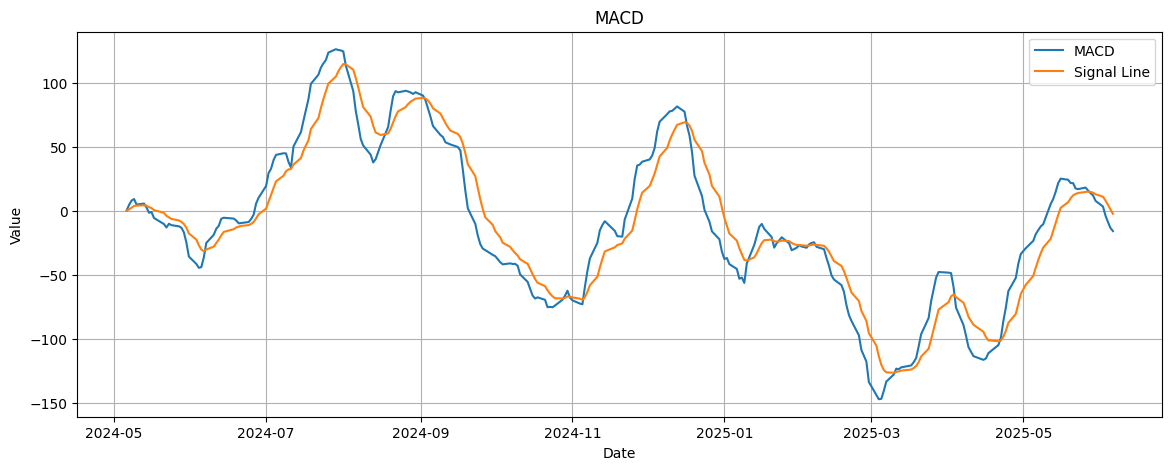

In [9]:
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14,5))
plt.plot(data.index, data['MACD'], label='MACD')
plt.plot(data.index, data['Signal_Line'], label='Signal Line')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Volatility

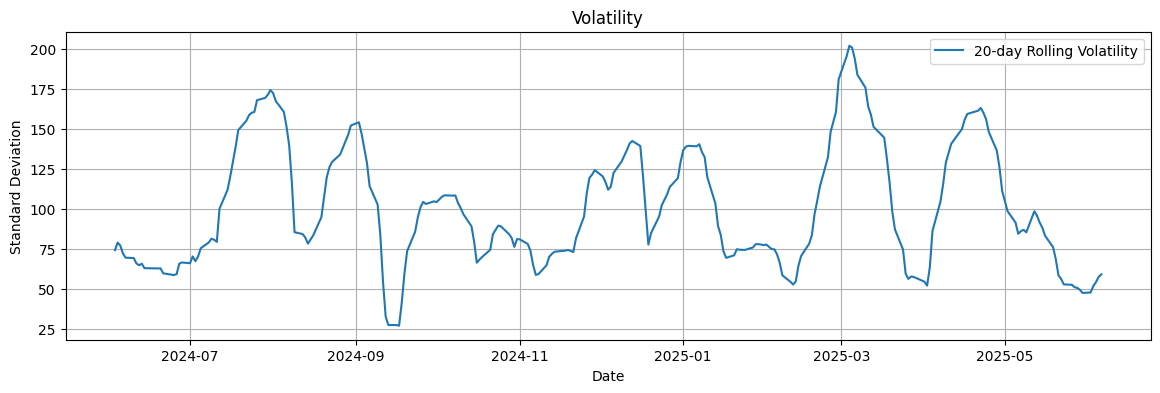

In [10]:
data['Volatility_20'] = data['Close'].rolling(window=20).std()

plt.figure(figsize=(14,4))
plt.plot(data.index, data['Volatility_20'], label='20-day Rolling Volatility')
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


### Daily Returns

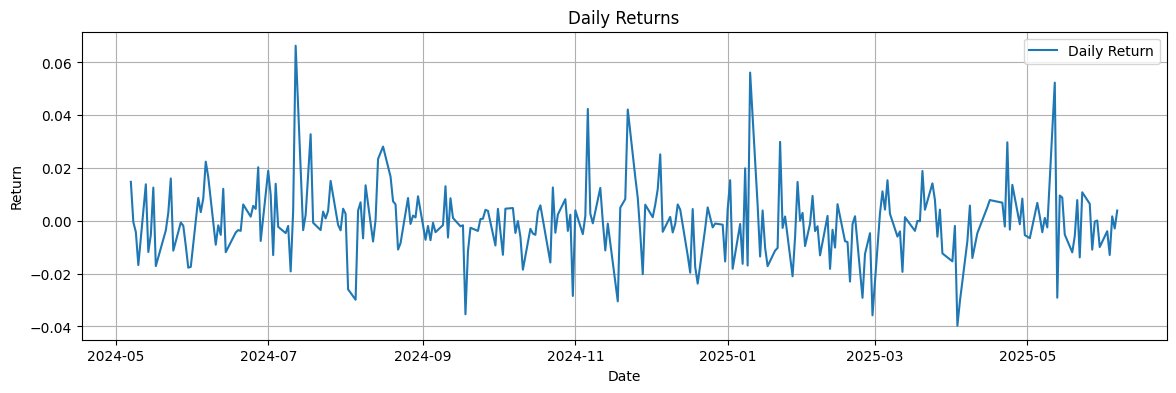

In [11]:
data['Daily_Return'] = data['Close'].pct_change()

plt.figure(figsize=(14,4))
plt.plot(data.index, data['Daily_Return'], label='Daily Return')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

### Lag Features (past 3 days Close prices)

In [12]:
for lag in range(1, 4):
    data[f'Lag_{lag}'] = data['Close'].shift(lag)

# Just show lag features table head
print(data[[f'Lag_{i}' for i in range(1,4)]].head(7))

Price             Lag_1        Lag_2        Lag_3
Ticker                                           
Date                                             
2024-05-06          NaN          NaN          NaN
2024-05-07  3831.022705          NaN          NaN
2024-05-08  3887.593262  3831.022705          NaN
2024-05-09  3885.638916  3887.593262  3831.022705
2024-05-10  3869.273682  3885.638916  3887.593262
2024-05-13  3804.495850  3869.273682  3885.638916
2024-05-14  3857.158691  3804.495850  3869.273682


In [13]:
data

Price,Close,High,Low,Open,Volume,MA_5,MA_10,MA_20,RSI_14,MACD,Signal_Line,Volatility_20,Daily_Return,Lag_1,Lag_2,Lag_3
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2024-05-06,3831.022705,3849.488665,3764.535086,3764.535086,2053831,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2024-05-07,3887.593262,3896.435521,3823.646041,3840.548881,2062112,NaN,NaN,NaN,NaN,4.512751,0.902550,NaN,0.014766,3831.022705,NaN,NaN
2024-05-08,3885.638916,3892.820255,3848.169578,3870.055177,1247685,NaN,NaN,NaN,NaN,7.841052,2.290251,NaN,-0.000503,3887.593262,3831.022705,NaN
2024-05-09,3869.273682,3879.825761,3820.275222,3871.032401,1726486,NaN,NaN,NaN,NaN,9.053851,3.642971,NaN,-0.004212,3885.638916,3887.593262,3831.022705
2024-05-10,3804.495850,3882.366126,3795.849189,3871.618686,1672489,3855.604883,NaN,NaN,NaN,4.733408,3.861058,NaN,-0.016742,3869.273682,3885.638916,3887.593262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,3419.407227,3429.517316,3388.482148,3419.605416,1877585,3450.867480,3465.269482,3474.076196,41.222414,3.173355,10.855809,48.000378,-0.003927,3432.887207,3467.281738,3466.885010
2025-06-03,3375.199951,3442.898273,3370.541407,3415.640549,2848125,3432.332227,3456.041479,3471.360327,31.232016,-3.904130,7.903821,52.022359,-0.012928,3419.407227,3432.887207,3467.281738


In [14]:
import seaborn as sns

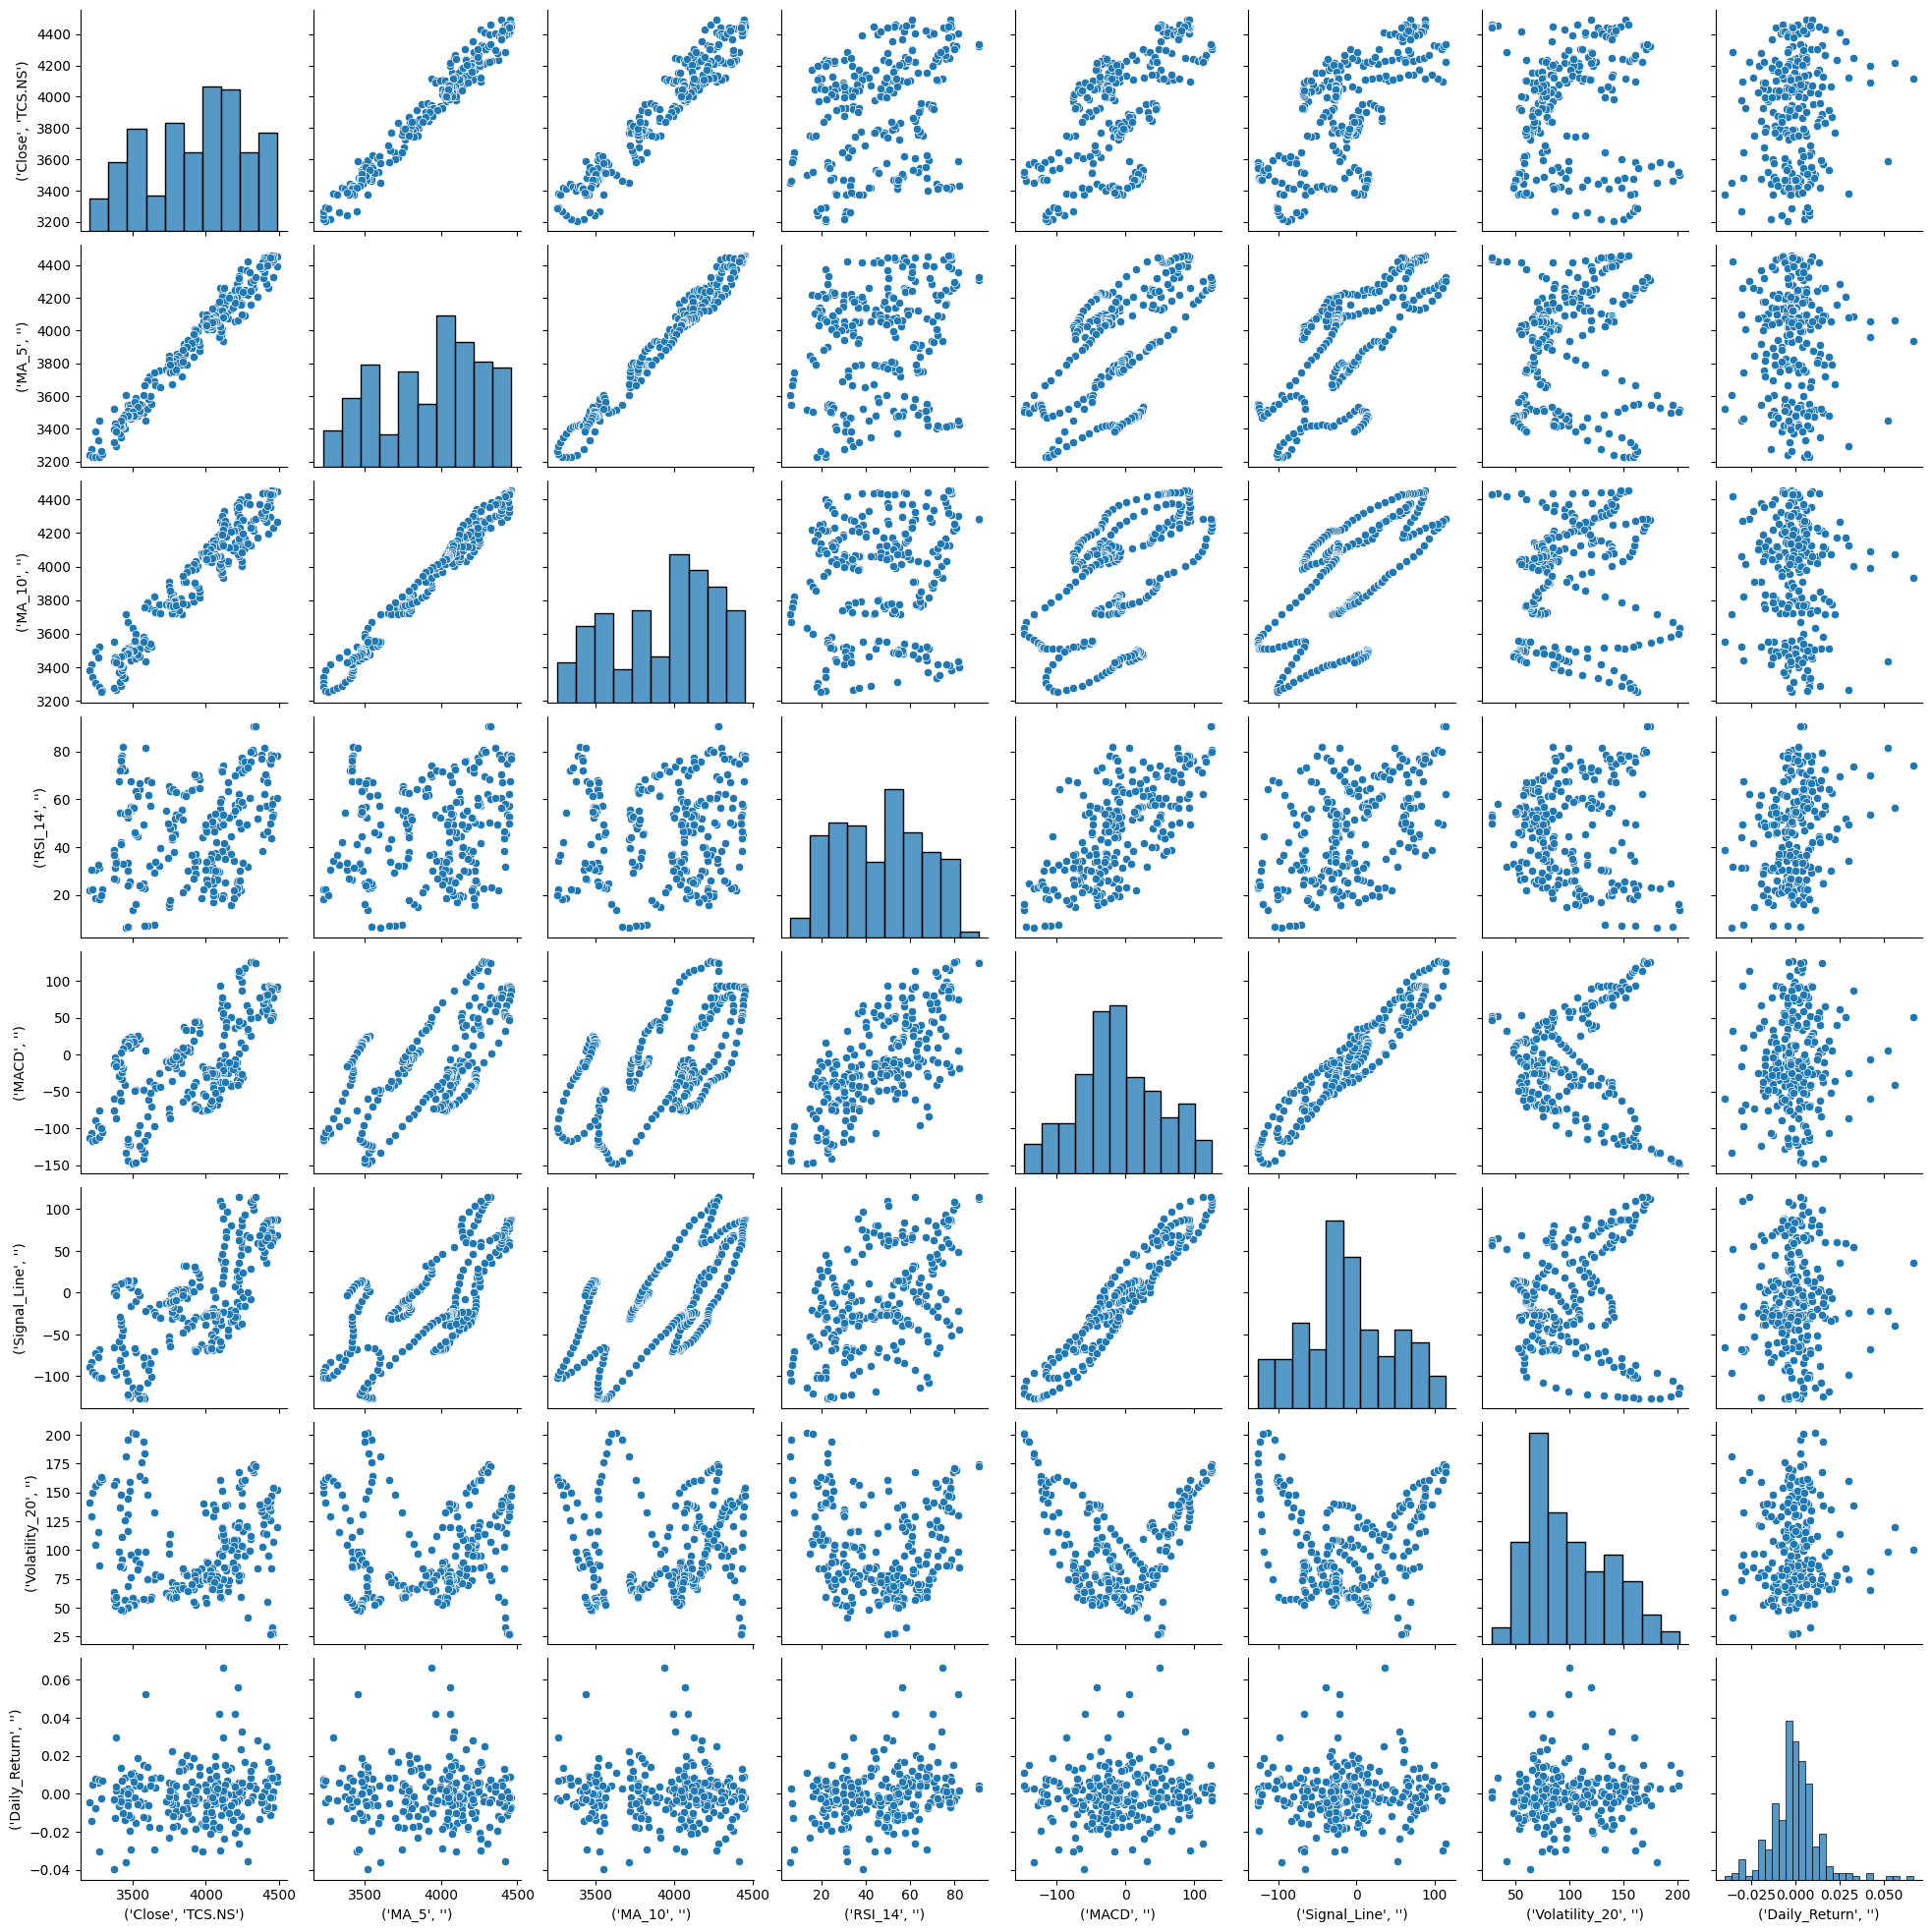

In [15]:
sns.pairplot(data[['Close', 'MA_5', 'MA_10', 'RSI_14', 'MACD', 'Signal_Line', 'Volatility_20', 'Daily_Return']])
plt.show()

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

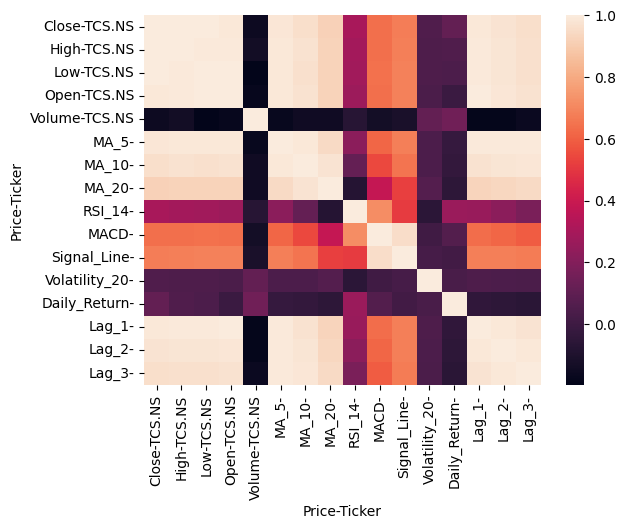

In [16]:
sns.heatmap(data.corr())

In [36]:
cols = ['Close', 'Volume', 'MA_5', 'MA_10', 'RSI_14', 'MACD', 'Volatility_20', 'Lag_1']
df = data[cols]

In [37]:
df

Price,Close,Volume,MA_5,MA_10,RSI_14,MACD,Volatility_20,Lag_1
Ticker,TCS.NS,TCS.NS,,,,,,
Date,,,,,,,,
2024-05-06,3831.022705,2053831,NaN,NaN,NaN,0.000000,NaN,NaN
2024-05-07,3887.593262,2062112,NaN,NaN,NaN,4.512751,NaN,3831.022705
2024-05-08,3885.638916,1247685,NaN,NaN,NaN,7.841052,NaN,3887.593262
2024-05-09,3869.273682,1726486,NaN,NaN,NaN,9.053851,NaN,3885.638916
2024-05-10,3804.495850,1672489,3855.604883,NaN,NaN,4.733408,NaN,3869.273682
...,...,...,...,...,...,...,...,...
2025-06-02,3419.407227,1877585,3450.867480,3465.269482,41.222414,3.173355,48.000378,3432.887207
2025-06-03,3375.199951,2848125,3432.332227,3456.041479,31.232016,-3.904130,52.022359,3419.407227


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

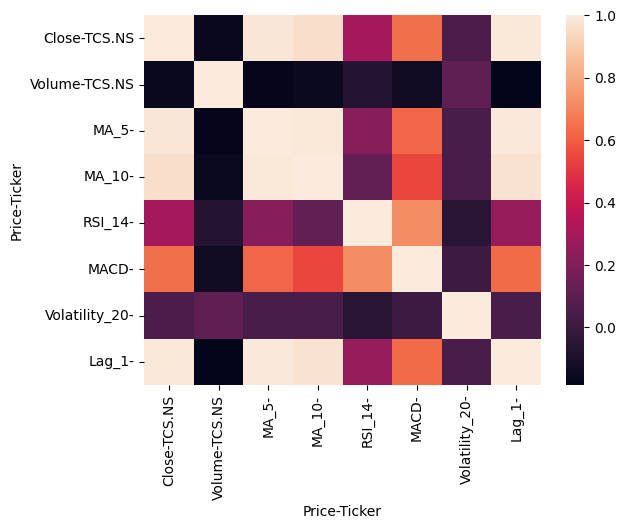

In [38]:
sns.heatmap(df.corr())

In [41]:
features = ['Volume', 'MA_5', 'MA_10', 'RSI_14', 'MACD', 'Volatility_20', 'Lag_1']
target = 'Close'

MSE: 2940.2097
R² Score: 0.7592


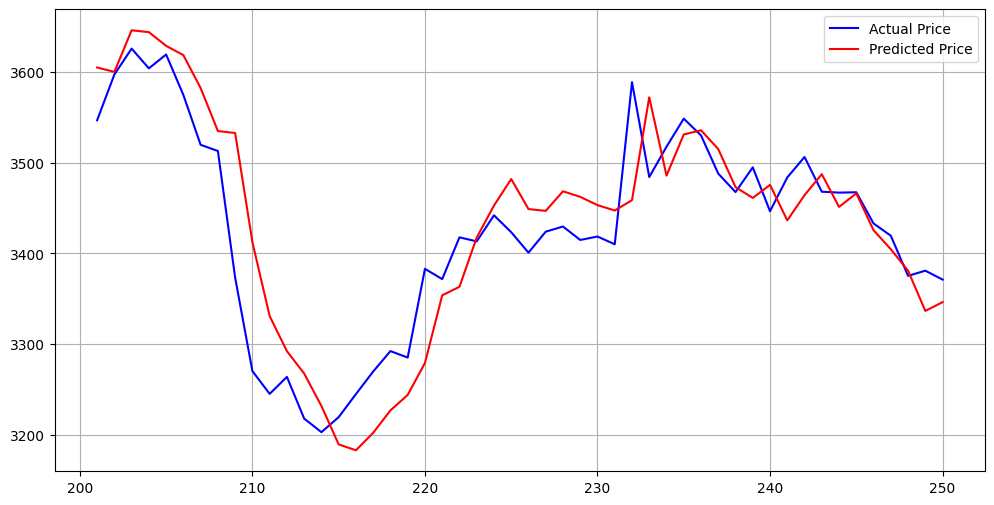

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data_clean = df.dropna()

# Extract features and target
X = data_clean[features].values
y = data_clean[target].values

# Scaling entire feature set (Scaler fitted only on the train set in each loop)
scaler = StandardScaler()

# Initial training size (e.g., first 60 points)
train_size = int(len(X) * 0.8)  # Dynamically set train size (80%)

predictions = []
actuals = []

if len(X) - 1 > train_size:
    for i in range(train_size, len(X)-1):
        X_train = X[:i]
        y_train = y[:i]

        X_test = X[i].reshape(1, -1)

        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        predictions.append(y_pred[0])
        actuals.append(y[i])

    # Evaluation
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    print(f'MSE: {mse:.4f}')
    print(f'R² Score: {r2:.4f}')

    plt.figure(figsize=(12,6))
    plt.plot(range(train_size, len(y)-1), actuals, label='Actual Price', color='b')
    plt.plot(range(train_size, len(y)-1), predictions, label='Predicted Price', color='r')
    plt.legend()
    plt.grid(True)
    plt.show()

## Analysis of Model & Interpretation

In [43]:
feature_names = ['Volume', 'MA_5', 'MA_10', 'RSI_14', 'MACD', 'Volatility_20', 'Daily_Return', 'Lag_1']

coefficients = model.coef_.flatten()

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature:15s} : {coef:.4f}")  # if coef is like array([value])

Volume          : 8.5255
MA_5            : 100.1809
MA_10           : 21.8638
RSI_14          : 35.0887
MACD            : -19.4562
Volatility_20   : 3.3247
Daily_Return    : 227.7077


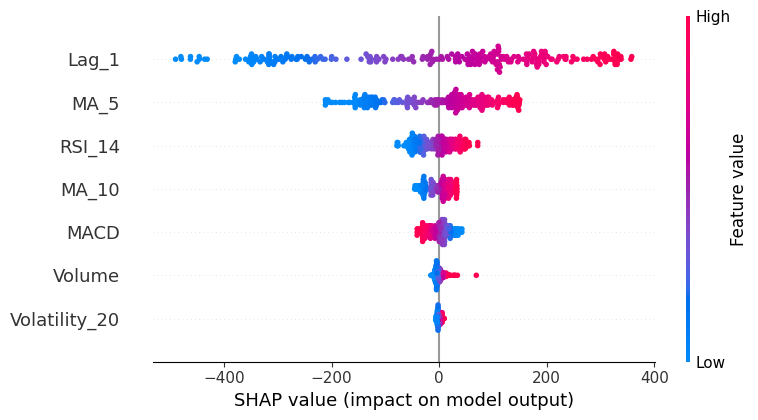

In [44]:
import shap

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, feature_names=features)


In [48]:
sample_day = 55  # Pick a day after training
X_sample = X[sample_day].reshape(1, -1)
X_sample_scaled = scaler.transform(X_sample)
prediction = model.predict(X_sample_scaled)

contribution = X_sample_scaled.flatten() * coefficients
for feat, contrib in zip(feature_names, contribution):
    print(f"{feat}: contributes {contrib:.4f} to price")

print(f"Predicted Price: {float(prediction[0]):.2f}")

Volume: contributes -3.8649 to price
MA_5: contributes 143.8490 to price
MA_10: contributes 22.8766 to price
RSI_14: contributes 16.7521 to price
MACD: contributes -31.5024 to price
Volatility_20: contributes 2.3298 to price
Daily_Return: contributes 358.5801 to price
Predicted Price: 4452.86
